In [1]:
import pandas as pd
import numpy as np

names = pd.read_csv("./clase.txt")

dataset = pd.read_csv("./dataset_tissue.txt", skiprows=1, header=None).drop(0, axis=1).transpose()
print(dataset.shape)
Y = names.x.values

dic_clases={}
cont=0
for i in range(len(Y)):
    if Y[i] not in dic_clases:
        dic_clases[Y[i]] = (cont,[i])
        cont+=1
    else:
        dic_clases[Y[i]][1].append(i)

print(dic_clases)


(189, 22215)
{'kidney': (0, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 120, 121, 122, 126, 127, 128, 132, 133, 146, 147]), 'hippocampus': (1, [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 135]), 'cerebellum': (2, [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 134, 142, 143, 175, 176, 177, 178, 179, 180, 181, 182]), 'colon': (3, [86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]), 'liver': (4, [123, 124, 125, 129, 130, 131, 136, 137, 138, 139, 140, 141, 144, 145, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]), 'endometrium': (5, [148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162]), 'placenta': (6, [183, 184, 185, 186, 187, 188])}


In [2]:
from sklearn.decomposition import PCA

n_comp = 66
pca = PCA(n_components=n_comp)
principal_components = pca.fit_transform(dataset)

df_pca = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_comp)])

X = df_pca.values

print(X)

[[-33.36763725 -27.601399    50.92606167 ...  -0.93537227   6.0752996
    0.90397353]
 [-41.48310326 -36.99128399  36.45687417 ...  -0.15397638  -1.59726078
    2.95696445]
 [-41.32311415   3.8035407   36.12911397 ...  -1.23929377  -1.3843091
   -3.30786747]
 ...
 [-43.96330782 -36.2730025  -11.02132248 ...   4.38096919  -5.11013518
   -1.15487541]
 [-45.48406094 -24.41609103 -21.33784779 ...  -6.35263129   0.50883635
    2.63289423]
 [-51.8981521  -22.01633933 -27.14429491 ...  -1.12077432   3.10436643
   -2.65145186]]


In [16]:
from sklearn.cluster import AgglomerativeClustering

# Create the model and train with data
model = AgglomerativeClustering(n_clusters=7)
model.fit(X)

try:
    df_pca.insert(df_pca.shape[1], "cluster_labels", model.labels_)
except:
    df_pca["cluster_labels"] = model.labels_

<function matplotlib.pyplot.show(close=None, block=None)>

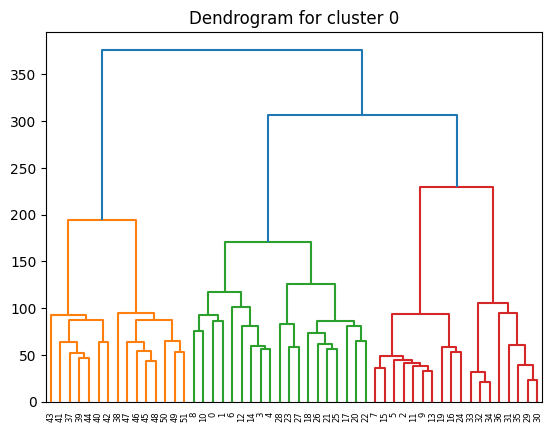

In [45]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

cluster_index = 0
cluster_indices = [i for i, label in enumerate(model.labels_) if label == cluster_index]
cluster_data = dataset.iloc[cluster_indices]

dendrogram = sch.dendrogram(sch.linkage(cluster_data, method="ward"))
plt.title('Dendrogram for cluster 0')
plt.show

In [18]:
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(dataset)

In [42]:
data_pc1 = [data_2d[i][0] for i in range(len(data_2d))]
data_pc2 = [data_2d[i][1] for i in range(len(data_2d))]

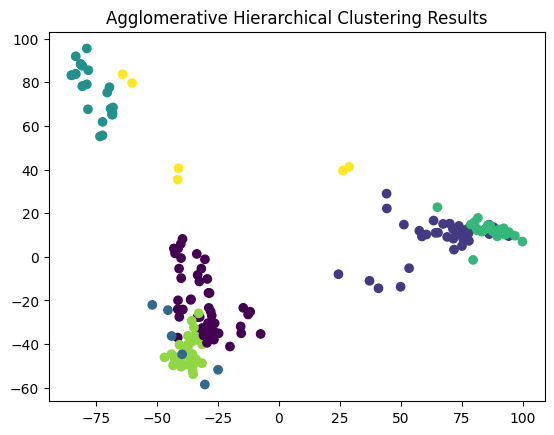

In [43]:
plt.scatter(data_pc1, data_pc2, c=model.labels_, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering Results')
plt.show()


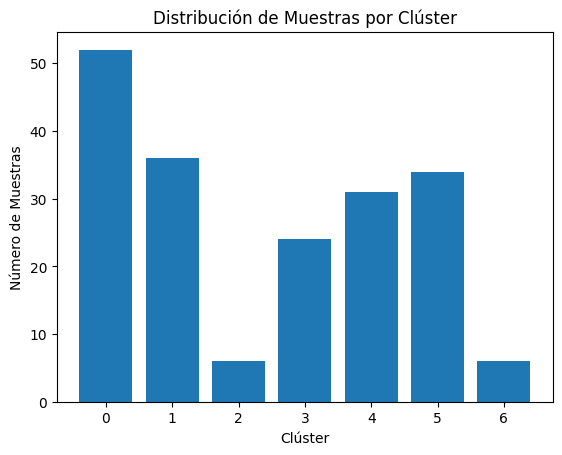

In [44]:
plt.hist(model.labels_, bins=range(0, max(model.labels_)+2), align='left', rwidth=0.8)
plt.xticks(range(0, max(model.labels_)+1))
plt.title('Distribución de Muestras por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Número de Muestras')
plt.show()

In [9]:
dict_clases = {}

index = 0
for clase in Y:
    if clase not in dict_clases:
        dict_clases[clase] = index
        index += 1


y_true = [dict_clases[clase] for clase in Y]


In [46]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
y_pred = model.labels_

# Calculate ARI (Adjusted Rand Index)
ari = adjusted_rand_score(y_true, y_pred)

# Calcular el MI (Mutual Information Score)
mi = normalized_mutual_info_score(y_true, y_pred)

# Show Results
print("Adjusted Rand Index (ARI):", ari)
print("Mutual Information Score (MI):", mi)

Adjusted Rand Index (ARI): 0.7909846948799858
Mutual Information Score (MI): 0.868062097950902
